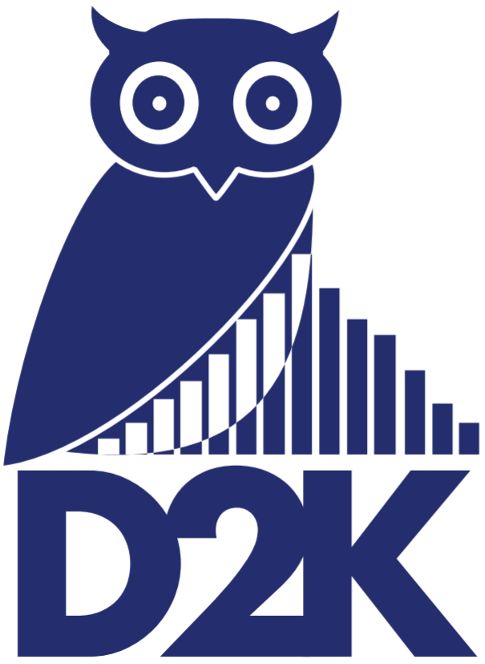 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 4 ###

In [ ]:
### standard imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import random
random.seed(2022)

import statsmodels.api as sm
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

## Part I: Simulation Study

In this part, we will carry out simulation study to calculate Type I and Power (Type II error) empirically. Let's use the Swain vs. Alabama example in class to carry out the simulation study. 

**Question 1.1**: Design a simulation study to calculate Type I error, use $\alpha = 0.05$. Before you proceed, develop a plan and some pseudo code for the simulation.

In [ ]:
### define some parameters

# significance level
alpha = 0.05
# population proportion in null hypothesis
null_p = ...
# sample size
sample_size = ...
# number of times to simulate
rep = 1000000

In [ ]:
# simulate the sampling distribution of the test stat under the null
simu_null_dist = np.random.binomial(n=..., p=..., size=...)

In [ ]:
# create a histogram of the sampling distribution of the test stat under the null
# why it is so normal
plt.hist(..., bins=20, alpha=0.4, density=True)
plt.title("Sampling Distribution Under the Null");

In [ ]:
# carry out tests when null is true
num_test = 10000
# in this case, obs_stat should be from null distribution as well
obs_stat = np.random.binomial(n=..., p=..., size=...)

In [ ]:
# place holder to same all p-values
# how many of p-values? same as length of obs_stat
p_values = []
for i in obs_stat:
    # how to calculate p-values in this case?
    one_p_value = ...
    p_values = np.append(p_values, one_p_value)

In [ ]:
### Type I Error

# this is when you reject but null is true
# we reject when p-values < alpha
I_error = ...
# you should expect I_error < alpha, why???
I_error

In [ ]:
### Distribution of p-values under the null

plt.hist(p_values, alpha=0.4, density=True)
plt.title("P-value Distribution Under the Null");

The purpose of plotting all the p-values is to convince you that p-values under the null follow Uniform[0, 1] distribution. If it is not so obvious, increase the number of test to 1000000 (warning: it may take a long time to run...)

We will not do the proof, but if you remember a CDF of any continuous random variable is a Uniform[0, 1]. While a p-value under the null is not exactly a CDF, but a tail probability is almost the CDF…

**Question 1.2**: Design a simulation study to calculate Type II error and Power, also use $\alpha = 0.05$. Now this is a scenario that the observed data is not from the null hypothesis. In order to be able to calculate the probability, we will need to make an assumption about what the "true" data generating mechanism is. But the beauty of simulation is that you can always change the assumptions and rerun your code! You can also reuse some of the parameters we defined in previous question, including the `simu_null_dist`.

In [ ]:
### define some more parameters

# "the real population proportion" that data is from
# let's assume it is 0.15 instead of 0.26 which reflect selection bias of jury panel
pop_p = 0.15

In [ ]:
# generate data to perform the tests
num_test = 10000
# in this case, obs_stat should NOT be from the null
# but from some alternative distribution defined by pop_p
obs_stat = np.random.binomial(n=..., p=..., size=...)

In [ ]:
# carry out tests when null is NOT true
# calculate the p-values for each test
# notice p-values are calculated in the same way as in previous problem!
p_values = []
for i in obs_stat:
    one_p_value = ...
    p_values = np.append(p_values, one_p_value)

In [ ]:
### Type II Error and Power

# this is when you fail to reject but null is NOT true
II_error = ...
# Power is 1 - type II error
Power = 1 - II_error
print(II_error, Power)

**Question 1.3**: Now rewrite the code into modular functions, and perform a power analysis. In particular, we would like to vary the sample size and the data generating assumption, and see how does each affect the power of the same test.

In [ ]:
### function to generate sampling distribution under the null

def null_sampling_dist(null_p=0.26, sample_size=100, rep=10000):
    ''' simulate the sampling distribution of the 
    test statistic under the null.
    null_p: the population proportion under the null
    sample_size: sample size to calculate the stat
    rep: how many times to simulate the stat
    '''
    simu_null_dist = ...
    return(simu_null_dist)

In [ ]:
### function to generate observed stat for a population distribution

def gen_obs_stat(pop_p=0.26, sample_size=100, num_test=10000):
    ''' simulate the observed test stat
    pop_p: the data-generating population proportion
    pop_p = null_p means null is true, otherwise null is NOT true
    sample_size: sample size to calculate the stat
    rep: how many times perform the test
    '''
    obs_stat = ...
    return(obs_stat)

In [ ]:
### function to calculate p-values

def cal_p_values(obs_stat, null_dist):
    ''' simulate carrying out the tests
    obs_stat: the observed test stat
    simu_null_dist: simulated sampling distribution of test stat under the null
    '''
    p_values = []
    for i in obs_stat:
        one_p_value = ...
        p_values = np.append(p_values, one_p_value)
    return(p_values)

In [ ]:
### function to calculate power

def cal_power(p_values, alpha=0.05):
    ''' simulate carrying out the tests
    obs_stat: the observed test stat
    simu_null_dist: simulated sampling distribution of test stat under the null
    '''
    power = ...
    return(power)

In [ ]:
### study power vs. sample size

# assume data is from population proportion of 0.15
pop_p = 0.15
# vary sample size from 20 to 200
sample_size = np.arange(20, 201, 5)
# place holder for power for each sample size
powers = []

for s in sample_size:
    null_dist = ...
    obs_stat = ...
    p_values = ...
    power = ...
    powers = ...

In [ ]:
# put in a dataframe
sample_size_power = pd.DataFrame({'Sample Size': sample_size, 'Power': powers})
sample_size_power

In [ ]:
# plot !!!
# power should increase as sample size increases
# there may be small kinks because it is empirical, not theoretical power 

sample_size_power.plot(x='Sample Size', y='Power')
plt.title('True population proportion fixed at 0.15');

In [ ]:
### study power vs. effect size

# assume sample_size is 100
sample_size = 100
# vary population proportion from 0.1 to 0.26
pop_p = np.arange(0.10, 0.261, 0.01)
# place holder for power for each pop_p
powers = []

for pp in pop_p:
    null_dist = ...
    obs_stat = ...
    p_values = ...
    power = ...
    powers = ...

In [ ]:
# put in a dataframe
effect_size_power = pd.DataFrame({'True Population Proportion': pop_p, 'Power': powers})
# effect size is the difference between true population proportion and the null proportion
# for example, if null proportion is 0.26, but data was generated from population proportion of 0.15
# effect size = 0.26 - 0.15 = 0.11
effect_size_power['Effect Size'] = ...
effect_size_power

In [ ]:
# plot !!!
# power should increase as effect size increases

effect_size_power.plot(x='Effect Size', y='Power')
plt.title('Sample size fixed at 100');

## Part II: NHANES Case Study

In this part, we will be working with the [NHANES](https://www.cdc.gov/nchs/nhanes/index.htm) study (National Health and Nutrition Examination Survey) data from the 2015-2016 wave. The raw data for this study are available [here](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015)

In [ ]:
nhanes = pd.read_csv("nhanes_2015_2016.csv")
nhanes.head()

### Exploring the contents of a data set

Pandas has a number of basic ways to understand what is in a data set.  For example, above we used the '`shape`' method to determine the numbers of rows and columns in a data set.  The columns in a Pandas data frame have names, to see the names, use the '`columns`' method:

In [ ]:
print(nhanes.shape)
nhanes.columns

These names correspond to variables in the NHANES study.  For example, `SEQN` is a unique identifier for one person, and `BMXWT` is the subject's weight in kilograms ("BMX" is the NHANES prefix for body measurements). You can search for variable names and read about the description [here](https://wwwn.cdc.gov/nchs/nhanes/search/default.aspx)

The variables in the NHANES data set are documented in a set of "codebooks" that are available on-line. The codebooks for the 2015-2016 wave of NHANES can be found by following the links at the following page:

* [Demographics code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)

* [Body measures code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm)

* [Blood pressure code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm)

* [Alcohol questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm)

* [Smoking questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm)

For convenience, let's rename some of the variables to be descriptive.

In [ ]:
new_col_names = {'SEQN':'ID', 'ALQ130':'avg_drinks_per_day', 'SMQ020': 'smoker', 
                 'RIAGENDR':'gender', 'RIDAGEYR':'age', 'RIDRETH1':'race', 
                 'DMDCITZN':'citizen', 'DMDEDUC2':'educ_level', 
                 'DMDMARTL':'mari_stat', 'INDFMPIR':'fam_pov_income_ratio', 
                 'BPXSY1':'systolic_bp', 'BPXDI1':'diastolic_bp', 
                 'BMXWT':'weight', 'BMXHT':'height', 'BMXBMI':'bmi', 
                 'BMXLEG':'upper_leg_len', 'BMXARML':'upper_arm_len', 
                 'BMXARMC': 'arm_cir', 'BMXWAIST':'waist_cir'}

In [ ]:
nhanes.rename(columns=new_col_names, inplace=True)
nhanes.head()

In [ ]:
nhanes.dtypes

As we see here, most of the variables have floating point or integer data type.  Unlike many data sets, NHANES does not use any text values in its data.  For example, while many datasets would use text labels like "F" or "M" to denote a subject's gender, this information is represented in NHANES with integer codes.  The actual meanings of these codes can be determined from the codebooks.  For example, the variable `RIAGENDR` contains each subject's gender, with male gender coded as `1` and female gender coded as `2`.  The `RIAGENDR` variable is part of the demographics component of NHANES, so this coding can be found in the demographics codebook. Variables like `BMXWT` which represent a quantitative measurement will typically be stored as floating point data values.

### Missing values


When reading a dataset using Pandas, there is a set of values including 'NA', 'NULL', and 'NaN' that are taken by default to represent a missing value.  The full list of default missing value codes is in the '`read_csv`' documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).  This document also explains how to change the way that '`read_csv`' decides whether a variable's value is missing.

Pandas has functions called [`df.isna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) and [`df.notna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.notna.html) that can be used to identify where the missing and non-missing values are located in a data frame.  Below we use these functions to find out which columns contain missing values, the number of missing values, and which records/rows exactly contain the missing values. 

In [ ]:
# df.isnull().any will return True columns that contain missing value
# a lot of the columns has missing values in this case
nhanes.isna().any()

As an aside, note that there may be a variety of distinct forms of missingness in a variable, and in some cases it is important to keep these values distinct.  For example, in case of the DMDEDUC2 variable, in addition to the blank or NA values that Pandas considers to be missing, three people responded "don't know" (code value 9).  In many analyses, the "don't know" values will also be treated as missing, we will fix those later.

In [ ]:
# this returns the number of missing values in each column
nhanes.isna().sum()

In [ ]:
# this returns all the rows where BMI is missing
nhanes[nhanes['bmi'].isna()]

### Translation of all the categorical variables
For convenience, we list all the number code with informative text category names here, and we code missing values in those categorical variables properly.

- Gender:
    - 1: Male
    - 2: Female
- Smoker (smoked at least 100 cigarettes in life):
    - 1: Yes
    - 2: No
- Race: 
    - 1: Mexican American
    - 2: Other Hispanic
    - 3: Non-Hispanic White
    - 4: Non-Hispanic Black
    - 5: Other Race Including Multi-Racial
- Education Level:
    - 1: < 9th grade
    - 2: 9-11th grade
    - 3: HS/GED
    - 4: Some college/AA
    - 5: College
- Marital Status:
    - 1: Married
    - 2: Widowed
    - 3: Divorced
    - 4: Separated
    - 5: Never married
    - 6: Living w/partner
- Citizenship:
    - 1: US Citizen
    - 2: Non US Citizen

In [ ]:
# replace some code as missing values
nhanes['avg_drinks_per_day'] =  nhanes['avg_drinks_per_day'].replace({777:np.NaN, 999:np.NaN})
nhanes['smoker'] = nhanes['smoker'].replace({7:np.NaN, 9:np.NaN})
nhanes['educ_level'] = nhanes['educ_level'].replace({7:np.NaN, 9:np.NaN})
nhanes['mari_stat'] = nhanes['mari_stat'].replace({77:np.NaN})
nhanes['citizen'] = nhanes['citizen'].replace({7:np.NaN, 9:np.NaN})

### Graphical Exploration

In [ ]:
# age distribution
nhanes['age'].plot(kind='hist', bins=40);

In [ ]:
# age by gender
nhanes[nhanes['gender']==1]['age'].plot(kind='hist', bins=40, label='Male', alpha=0.4)
nhanes[nhanes['gender']==2]['age'].plot(kind='hist', bins=40, label='Female', alpha=0.4)
plt.legend();

In [ ]:
# histogram of blood pressure
nhanes[['systolic_bp', 'diastolic_bp']].plot(kind='hist', bins=40, alpha=0.5);

In [ ]:
# BMI by gender
nhanes[nhanes['gender']==1]['bmi'].plot(kind='hist', bins=40, density=True, label='Male', alpha=0.4)
nhanes[nhanes['gender']==2]['bmi'].plot(kind='hist', bins=40, density=True, label='Female', alpha=0.4)
plt.legend();

In [ ]:
# gener and education level 
# create a pivot table for ed level and gender
ed_gender = nhanes.pivot_table(index='educ_level', columns='gender', values='ID', aggfunc='count', fill_value=0)
ed_gender.plot(kind='bar')
# fix gender label
plt.legend(['Male','Female'])
# fix ed level label
plt.xticks(np.arange(5),['< 9th grade', '9-11th grade', 'high school', 'some college', '> college'], rotation=45);

In [ ]:
# race and education level 
ed_race = nhanes.pivot_table(index='educ_level', columns='race', values='ID', aggfunc='count', fill_value=0)
ed_race.plot(kind='bar')
# fix race label: Mexican American, Other Hispanic, Non-Hispanic White,Non-Hispanic Black,Other Race Including Multi-Racial
plt.legend(['Mexican','Hispanic','White','Black','Other'])
# fix ed level label: from codebook
plt.xticks(np.arange(5),['< 9th grade', '9-11th grade', 'HS/GED', 'Some college/AA', 'College'], rotation=45);

In [ ]:
# education and marital status
ed_mar = nhanes.pivot_table(index='educ_level', columns='mari_stat', values='ID', aggfunc='count', fill_value=0)
ed_mar.plot(kind='bar')
# fix marital status label
plt.legend(['Married','Widowed','Divorced','Separated','Never married', 'Living w/partner'])
# fix ed level label: from codebook
plt.xticks(np.arange(5),['< 9th grade', '9-11th grade', 'HS/GED', 'Some college/AA', 'College'], rotation=45);

In [ ]:
# age distribution by marital status
sns.boxplot(y='age', x='mari_stat', data=nhanes)
plt.xticks(np.arange(6), ['Married','Widowed','Divorced','Separated','Never married', 'Living w/partner'], rotation=45);

In [ ]:
# blood pressure 
nhanes.plot(kind='scatter', y='systolic_bp', x='diastolic_bp');

In [ ]:
# age and blood pressure 
nhanes.plot(kind='scatter', y='systolic_bp', x='age');

### Part II  HW Questions Start Here

For each of the hypothesis testing problems, please state the null hypothesis and alternative hypothesis clearly, and indicate whether the alternative is one-sided or two-sided. Select a statistical test that is appropriate and implement it in one or multiple ways. Assume significant level $\alpha = 0.05$ unless otherwise stated.

[`scipy.stats` statistical tests](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)

**Question 2.1**:

Suppose that the proportion of smokers in the US was known to be 40%, and we want to assess whether the proportion of smokers in the NHANES data were different from 40%. Notice the `Smoker` column indicates the status of smoking, and we will ignore all the missing data, and take the proportion of `Smoker` coded 1 as smokers. 

Carry out the test for population proportion of smokers being 40%. Do this in three ways!

**Solution**:

Null hypothesis: ...

Alternative hypothesis: ...

In [ ]:
# define smoker, exclude missing values
smoker = nhanes['smoker'].dropna()==1

In [ ]:
p = ...
p_hat = ...
n = ...

First carry out this test "by hand": according to CLT, under the null:
$$ \frac{\hat{p} - p}{\sqrt{p(1-p)/n}} \sim \text{N}(0, 1) $$


In [ ]:
z_score = ...
p_value = ...
print(z_score, p_value)

Carry out the same test using [`statsmodels.stats.proportion.proportions_ztest`](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html#statsmodels.stats.proportion.proportions_ztest):

In [ ]:
sm.stats.proportions_ztest(count=..., nobs=..., value=..., alternative=...)
# this returns z-score and p-value

Carry out the same test using [`statsmodels.stats.proportion.binom_test`](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.binom_test.html):

In [ ]:
sm.stats.binom_test(count=..., nobs=..., prop=..., alternative=...)
# this only returns p-value, why is it slightly different?

Carry out the same test using [`scipy.stats.binom_test`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html#scipy.stats.binom_test):

In [ ]:
st.binom_test(x=..., n=..., p=..., alternative=...)
# this only returns p-value and it should be exactly the same as the above one

**Conclusion**:

...

**Question 2.2**:

We are interested in comparing BMI between male and female population. In general, we hypothesize the average BMI index in the female population is slightly higher than in male population. Carry out the test to answer this question. You can assume the BMI index follows normal distribution in the general population.

**Solution**:

Null hypothesis: ...

Alternative hypothesis: ...

In [ ]:
BMI_male = nhanes[nhanes['gender']==1]['bmi'].dropna()
BMI_female = nhanes[nhanes['gender']==2]['bmi'].dropna()
print("Average male BMI is %.3f" % np.mean(BMI_male), "with standard deviation: %.3f" % np.std(BMI_male))
print("Average female BMI is %.3f" % np.mean(BMI_female), "with standard deviation: %.3f" % np.std(BMI_female))

Which test should you use?

- [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp): 1-sample t-test
- [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind): 2-sample independent t-test 
- [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel): 2-sample paired t-test

In [ ]:
# make sure you specify if it is one-sided 
# most default is two-sided test
BMI_test = ...

In [ ]:
# get the p_value from test results
p_value = ...
p_value

**Conclusion**:

...

**Question 2.3**:

Are arm length and leg length the same on average? You can assume both follow normal distribution in the general population.

**Solution**:

Null hypothesis: ...

Alternative hypothesis: ...

In [ ]:
arm_leg = nhanes[['upper_leg_len', 'upper_arm_len']].dropna()
arm = arm_leg['upper_arm_len']
leg = arm_leg['upper_leg_len']

In [ ]:
print("Average arm length is %.3f" % np.mean(arm), "with standard deviation: %.3f" % np.std(arm))
print("Average leg length is %.3f" % np.mean(leg), "with standard deviation: %.3f" % np.std(leg))

Which test should you use?

- [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp): 1-sample t-test
- [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind): 2-sample independent t-test 
- [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel): 2-sample paired t-test

In [ ]:
arm_leg_test = ...
arm_leg_test

In [ ]:
p_value = ...
p_value

**Conclusion**:

...

**Question 2.4**:

From the previous test, we are further interested in exploring the relationship between the arm length and leg length. Let's test whether these two are linearly associated in a positive way, i.e, positively correlated. In other words, we would like to calculate the Pearson correlation between the two and formally test whether the correlation is a positive one. Let's first create a scatter plot to visually explore the correlation:

In [ ]:
# arm length vs. leg length
nhanes.plot(kind='scatter', y='upper_leg_len', x='upper_arm_len');

**Solution**:

Null hypothesis: ...

Alternative hypothesis: ...

Which test to use?

- [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr): test Pearson correlation between two numerical variables

In [ ]:
cor_test = ...
cor_test

In [ ]:
p_value = ...
p_value

**Conclusion**:

...

If you are feeling fancy, we can create a plot with hypothesis testing result for the Pearson correlation:

In [ ]:
# sns contour plot with kernal density estimate
# also performing a hypothesis test on Pearson correlation
# ignore the warning message
sns.jointplot(kind='kde', y='upper_leg_len', x='upper_arm_len', data=nhanes).annotate(st.pearsonr);

**Question 2.5**:

We want to test whether the age distribution in the NHANES dataset is normal.  

**Solution**:

Null hypothesis: ...

Alternative hypothesis: ...

Which test to use? All three can be used, but with different test statistics. 

- [`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest): Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for goodness of fit.
- [`scipy.stats.shapiro`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro): Perform the Shapiro-Wilk test for normality.
- [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html#scipy.stats.normaltest): Test whether a sample differs from a normal distribution.

In [ ]:
age = nhanes['age'].dropna()

In [ ]:
norm_test = ...
norm_test

In [ ]:
p_value = ...
p_value

**Conclusion**:

...

**Question 2.6**:
We would like to further test whether the age distribution of male and female are the same in the NHANES dataset. 

**Solution**:

Null hypothesis: ...

Alternative hypothesis: ...

Which test to use?

- [`scipy.stats.kstest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest): Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for goodness of fit.
- [`scipy.stats.ks_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html#scipy.stats.ks_1samp): one-sample Kolmogorov-Smirnov test for goodness of fit.
- [`scipy.stats.ks_2samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp): two-sample Kolmogorov-Smirnov test for goodness of fit.

In [ ]:
male_age = nhanes[nhanes['gender']==1]['age'].dropna()
female_age = nhanes[nhanes['gender']==2]['age'].dropna()

In [ ]:
gender_age_test = ...
gender_age_test

In [ ]:
p_value = ...
p_value

**Conclusion**:

...

**Question 2.7**:
We would like to test whether marital status and education level are independent. 

**Solution**:

Null hypothesis: ...

Alternative hypothesis: ...

Which test to use?

- [`scipy.stats.chi2_contingency`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html#scipy.stats.chi2_contingency): Chi-square test of independence of variables in a contingency table.
- [`scipy.stats.chisquare`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare): one-sample Kolmogorov-Smirnov test for goodness of fit.

In [ ]:
# remember this pivot table we used to create bar plots
# this is marital status by education level
ed_mar

In [ ]:
# make the pivot table look nice with informative labels
ed_mar.rename(columns={1:'Married', 2:'Widowed', 3:'Divorced', 4:'Separated', 5:'Never married', 6:'Living w/partner'}, 
              index={1:'< 9th grade', 2:'9-11th grade', 3:'HS/GED',  4:'Some college/AA', 5:'College'},
              inplace=True)
ed_mar

In [ ]:
ind_test = ...
ind_test

In [ ]:
p_value = ...
p_value

**Conclusion**:

...

WooHoo~~ You're done with HW 4!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing with your name,
* **Upload** your file to the course website.